## 一、Logistic回归定义
- logistic回归又称logistic回归分析，是一种广义的线性回归分析模型，逻辑回归的原理是用逻辑函数把线性回归的结果(-∞,∞)映射到(0,1)
- 逻辑回归是分类算法，大家都熟悉线性回归，一般形式是Y=aX+b，y的取值范围是[-∞, +∞]
- 如何实现分类：把Y的结果带入一个非线性变换的Sigmoid函数中，即可得到S取值范围(0,1)，可以看成是一个概率分布

### 应用场景
- 预测一个用户是否点击特定的商品
- 判断用户的性别
- 预测用户是否会购买给定的品类
- 判断一条评论是正面的还是负面的

### 逻辑函数
表达式：

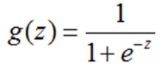

函数图：

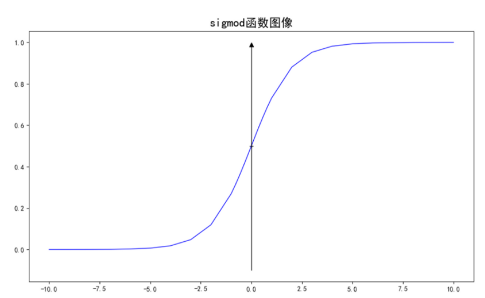

函数中z无论取什么值，其结果都在[0,-1]的区间内，我们假设分类的阈值是0.5，那么超过0.5的归为A分类，低于0.5的归为B分类，阈值是可以自己设定的。

## 二、逻辑函数的导函数
逻辑函数的表达式为：

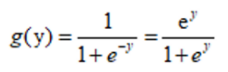

导函数为：

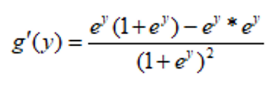


可做如下转换：
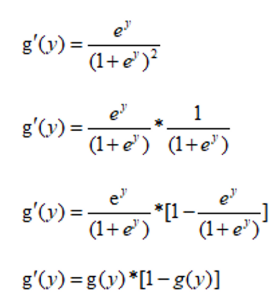

逻辑函数是一个连续且任意阶可导的函数

## 三、如何求解逻辑回归中的参数？
### 1、极大似然函数

举个例子；如果我们已经积累了大量的违约客户和正常客户的样本数据，利用极大似然函数由果溯因，估计出**使得目前结果的可能性最大**参数(系数)θ，有了参数我们就可以求任何一个客户违约的概率了。

我们假设信贷违约的后验概率：
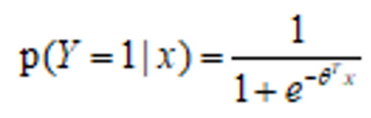

相应的可以得到客户不违约的概率：
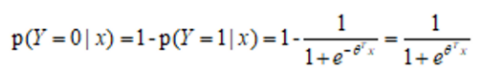

如果令
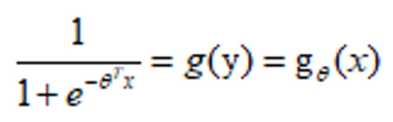

违约的后验概率可以写成：
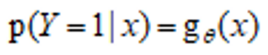

不违约的后验概率可以写成：
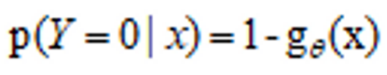

对于某一个客户，我们采集到了样本数据(x,y)。对于这个样本，他的标签是y的概率可以定义成：
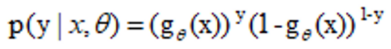

其中y∈{0,1}。当y=0时，上式为不违约的后验概率，当y=1时，上式为违约的后验概率。

现在我们有m个客户的观测样本：

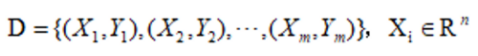

将每一个样本发生的概率相乘，就是这个合成在一起得到的合事件发生的总概率(利用概率中的乘法公式)，即为似然函数，可以写成：

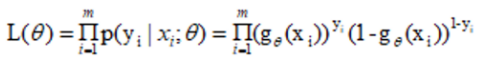
其中θ为待求参数。

**注**：我们总是希望出现目前结果的可能性最大，所以想要得到极大化似然函数对应的参数θ。

为便于求解，我们引入不改变函数单调性的对数函数ln，把连乘变成加法，得到对数似然函数：
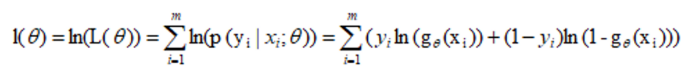

至此，可以用梯度上升法求解对数似然函数，求出使得目前结果的可能性最大的参数θ。

### 2、最小化损失函数

方式二我们基于对数似然函数构造损失函数，用梯度下降法求出使得损失最小对应的参数θ

损失函数需求满足两个条件：

1、损失函数 可以衡量 模型的好坏

2、参数可导，便于求解最优解，也就是损失函数的最小值

结合上式中的极大似然函数，如果取整个数据集上的平均对数似然损失，我们可以得到:
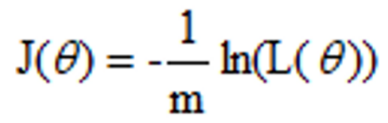

其中J(θ)为**损失函数**，**由对数似然函数前面添加负号取平均得到**。

即在逻辑回归模型中，最大化似然函数和最小化损失函数实际上是等价的(求最大化对数似然函数对应的参数θ和求最小化平均对数似然损失对应的参数θ是一致的)，即：
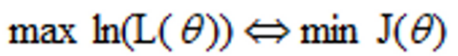

### 四. 逻辑回归常用的求解方法

梯度求解基本步骤如下：

- 选择下降方向（梯度方向，∇J(θ)）
- 选择步长，更新参数 θi=θi−1−αi∇J(θi−1)
- 重复以上两步直到满足终止条件


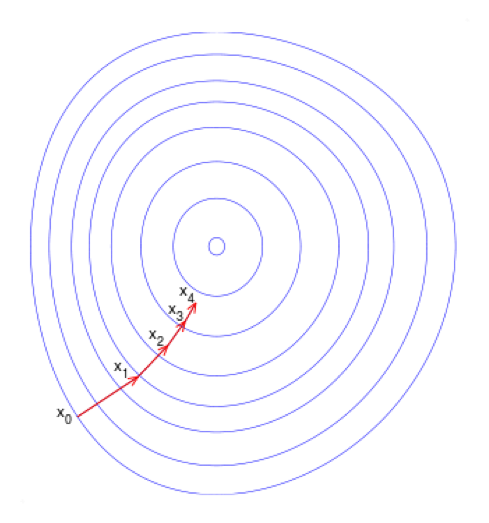

**4.1 一阶方法**

梯度下降、随机梯度下降、mini 随机梯度下降降法。随机梯度下降不但速度上比原始梯度下降要快，局部最优化问题时可以一定程度上抑制局部最优解的发生

**4.2 二阶方法：牛顿法、拟牛顿法：**

牛顿法其实就是通过切线与x轴的交点不断更新切线的位置，直到达到曲线与x轴的交点得到方程解。在实际应用中我们因为常常要求解凸优化问题，也就是要求解函数一阶导数为0的位置，而牛顿法恰好可以给这种问题提供解决方法

牛顿法首先选择一个点作为起始点，并进行一次二阶泰勒展开得到导数为0的点进行一个更新，直到达到要求，这时牛顿法也就成了二阶求解问题，比一阶方法更快

拟牛顿法： 不用二阶偏导而是构造出Hessian矩阵的近似正定对称矩阵的方法称为拟牛顿法。拟牛顿法的思路就是用一个特别的表达形式来模拟Hessian矩阵或者是他的逆使得表达式满足拟牛顿条件。主要有DFP法（逼近Hession的逆）、BFGS（直接逼近Hession矩阵）、 L-BFGS（可以减少BFGS所需的存储空间）。



### 五.可以进行多分类吗？
方式一：
- 1.将类型class1看作正样本，其他类型全部看作负样本，然后我们就可以得到样本标记类型为该类型的概率p1。

- 2.然后再将另外类型class2看作正样本，其他类型全部看作负样本，同理得到p2。

- 3.以此循环

方式二：

- 1.多元逻辑回归 Softmax更合适一些。Softmax 回归是直接对逻辑回归在多分类的推广，模型通过 softmax 函数来对概率建模

### 六.逻辑回归有什么优点
- LR能以概率的形式输出结果，而非只是0,1判定。
- LR的可解释性强，可控度高
- 训练快，feature engineering容易出效果
- 因为结果是概率，可以做ranking model

### 七. 逻辑回归有哪些应用
- CTR预估/推荐系统的learning to rank/各种分类场景。
- 某搜索引擎厂的广告CTR预估基线版是LR。
- 某电商搜索排序/广告CTR预估基线版是LR。
- 某电商的购物搭配推荐用了大量LR。
- 某新闻app排序基线是LR

### 八. 逻辑回归为什么要对特征进行离散化
- 1. 非线性！逻辑回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入了非线性，能够提升模型表达能力，加大拟合； 离散特征的增加和减少都很容易，易于模型的快速迭代；
- 2. 速度快！稀疏向量内积乘法运算速度快，计算结果方便存储，容易扩展；
- 3. 鲁棒性！离散化后的特征对异常数据有很强的鲁棒性：比如一个特征是年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰；
- 4. 方便交叉与特征组合：离散化后可以进行特征交叉，由M+N个变量变为M*N个变量，进一步引入非线性，提升表达能力；
- 5. 稳定性：特征离散化后，模型会更稳定，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。当然处于区间相邻处的样本会刚好相反，所以怎么划分区间是门学问；
- 6. 简化模型：特征离散化以后，起到了简化了模型，降低了模型过拟合的风险。



## 代码演示-LogisticRegression  

- 数据集 iris
- sklearn

In [20]:
## logistcs regresion
# encoding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
    
# 1.加载数据
iris = datasets.load_iris()
X = iris.data[:, :3]  #取特质
Y = iris.target


In [21]:
# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [22]:
# 3.标准化特征值 min-max / starnder deviion (平均值 + 方差=1）
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 

In [23]:
# 4. 训练逻辑回归模型
logreg = linear_model.LogisticRegression(C=1e5,max_iter=100, solver='liblinear',multi_class='ovr')
logreg.fit(X_train, Y_train)

LogisticRegression(C=100000.0, multi_class='ovr', solver='liblinear')

In [30]:
# 5. 预测
##多元逻辑回归 Softmax 回归更合适一些。Softmax 回归是直接对逻辑回归在多分类的推广，相应的模型也可以叫做多元逻辑回归（Multinomial Logistic Regression）。
#模型通过 softmax 函数来对概率建模
y_pred= logreg.predict_proba(X_test_std)
acc = logreg.score(X_test_std,Y_test)

print('Train/Test split results:')
print("准确率为 %2.3f" % acc)

Train/Test split results:
准确率为 0.767


In [25]:
y_pred

array([[1.02874873e-04, 9.99897125e-01, 5.12054704e-12],
       [3.53769621e-05, 9.99964623e-01, 2.24219144e-15],
       [5.98428095e-01, 4.01571905e-01, 2.89753357e-23],
       [8.67369149e-06, 9.99991326e-01, 2.77774960e-11],
       [5.00419499e-01, 4.99580501e-01, 9.16396955e-22],
       [9.34854023e-04, 9.99065146e-01, 1.68302565e-10],
       [5.00848915e-01, 4.99151085e-01, 2.11690915e-22],
       [1.34973809e-01, 8.65026191e-01, 4.61417192e-15],
       [3.24738739e-03, 9.96752613e-01, 9.34561033e-15],
       [5.90457082e-02, 9.40954292e-01, 7.43933503e-16],
       [1.04011511e-06, 9.99998960e-01, 5.29869371e-11],
       [3.40383071e-01, 6.59616929e-01, 2.91374571e-15],
       [1.53765517e-03, 9.98462345e-01, 9.32627861e-14],
       [5.46290921e-03, 9.94537091e-01, 8.55604648e-15],
       [5.20588117e-03, 9.94794119e-01, 8.38466375e-14],
       [5.01660908e-01, 4.98339092e-01, 5.79088444e-22],
       [1.25279728e-02, 9.87472027e-01, 3.25893817e-14],
       [2.20830480e-04, 9.99779